Chapter 27
# 一元概率密度估计
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.datasets import load_iris

In [2]:
# 从Scikit-Learn库加载鸢尾花数据
iris = load_iris()
y = iris.target
X_df = pd.DataFrame(iris.data)
X1_df = X_df.iloc[:,0]

In [3]:
# 自定义可视化函数
def visualize(x1,pdf,color):
    fig, ax = plt.subplots(figsize = (8,3))
    ax.fill_between(x1, pdf, 
                    facecolor = color,alpha = 0.2)
    ax.plot(x1, pdf,color = color)

    ax.set_ylim([0,1.4])
    ax.set_xlim([4,8])
    ax.set_ylabel('PDF')
    ax.set_xlabel('Sepal length, $x_1$')

In [4]:
# 不考虑标签
KDE = sm.nonparametric.KDEUnivariate(X1_df)
KDE.fit(bw=0.1)

In [5]:
x1 = np.linspace(4,8,101)
f_x1 = KDE.evaluate(x1)

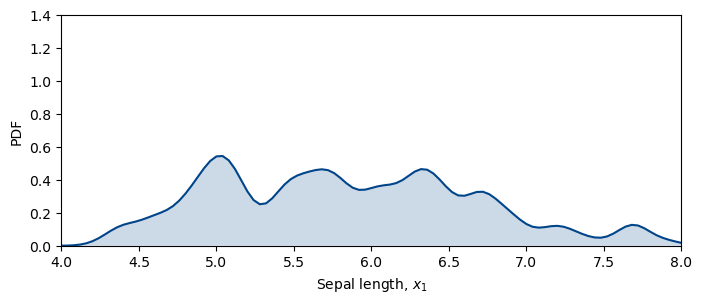

In [6]:
visualize(x1,f_x1,'#00448A')

In [7]:
# 考虑鸢尾花标签，用KDE描述样本数据花萼长度分布
colors = ['#FF3300','#0099FF','#8A8A8A']

In [8]:
x1 = np.linspace(4,8,161)

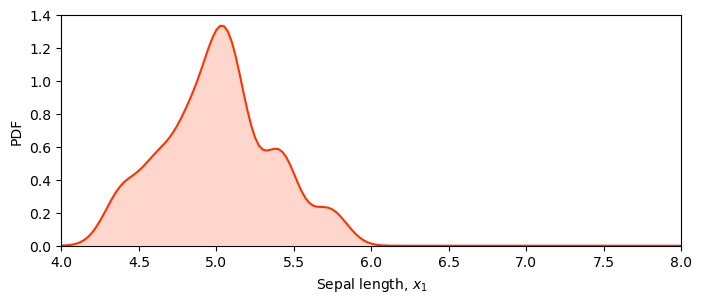

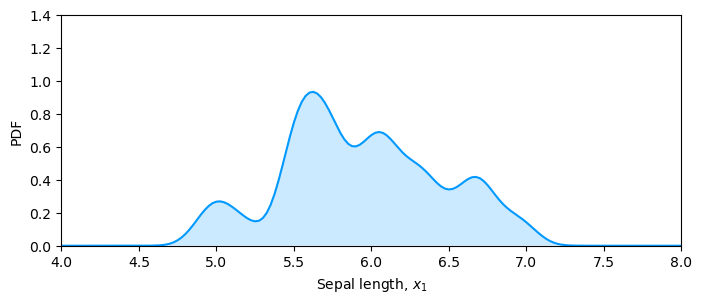

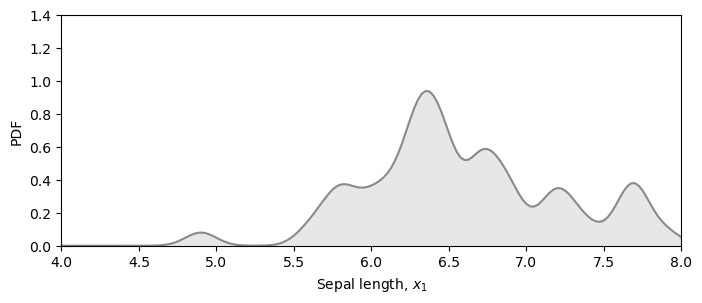

In [9]:
for idx in range(3):
    KDE_C_i = sm.nonparametric.KDEUnivariate(X1_df[y==idx])
    KDE_C_i.fit(bw=0.1)
    f_x1_given_C_i = KDE_C_i.evaluate(x1)
    
    visualize(x1,f_x1_given_C_i,colors[idx])